# Lab1: Intro to Data and Python Data Visualization using Iris Data

In this notebook we'll play with IRIS data, an introductory datset for Data Learners. Here we will plot Iris data using python. Get your hands dirty!


#### Data Set Information:

This is perhaps the best known database to be found in the data science literature. The data set contains 3 classes 
of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; 
the latter are NOT linearly separable from each other. 

#### Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

Check wikipedia for details - https://en.wikipedia.org/wiki/Iris_flower_data_set


#### We'll use three libraries for this tutorial: [pandas](http://pandas.pydata.org/), [matplotlib](http://matplotlib.org/), and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/).

## Geting Data

#### First Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 忽略警告
warnings.filterwarnings("ignore")

#### Read data

In [2]:
# df = pd.read_csv('iris.data.txt') 
df = sns.load_dataset('penguins')

In [3]:
type(df)

pandas.core.frame.DataFrame

#### Take a look at Data

This is the first thing you should do when you start to work on any dataset. Just one line of code!

In [4]:
# TODO
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
df.shape

(344, 7)

#### Dig some information on features, rows and columns

Here we've  total 150 rows and 5 columns. 

Check more

In [6]:
# TODO
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
set(df.species)

{'Adelie', 'Chinstrap', 'Gentoo'}

In [9]:
# from IPython.display import Image
# Image(url='https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification.png')

#### Descriptive Statistics

Observe data from statistics

In [10]:
# TODO
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data preprocessing


###  1. Handling missing values


In this step, we aim to address missing values within the numerical columns of our dataset. 

- **Please employ the `DataFrame.fillna()` method, leveraging the mean of each column as a replacement for its missing values.**

In [11]:
# Numerical columns
for column in df.select_dtypes(include='number').columns:
    df[column].fillna(df[column].mean(), inplace=True)

print('Penguins without missing values\n')
df

Penguins without missing values



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


###  2. Outlier Detection

In this step, we will focus on identifying and removing outliers from the numerical columns of our dataset using the Local Outlier Factor (LOF) model. LOF is an unsupervised algorithm that detects outliers by measuring the local deviation of a given data point with respect to its neighbors.
The `LocalOutlierFactor` class from `sklearn.neighbors` provides the functionality to detect outliers in a dataset. 

- **First, Read through the provided documentation, especially focusing on the ["Fit the model for outlier detection (default)"](https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html) section and [the usage of the fit_predict method](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor).**

- **Then, apply what you've learned: Use the LOF model to first identify outliers in your dataset and then remove them.**



In [12]:
from sklearn.neighbors import LocalOutlierFactor

# Outliers - LOF
lof = LocalOutlierFactor()
# TODO
y_pred = lof.fit_predict(df.select_dtypes(include='number'))
df = df[y_pred == 1]

print('Penguins without outliers\n')
df

Penguins without outliers



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,Female
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,Male
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,Female


### 3. Data normalization


`StandardScaler` from `sklearn.preprocessing` is a powerful and easy-to-use tool for applying z-score normalization to your dataset. 

- **Please apply z-score normalization to the numerical columns in your dataset.**

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# X = df.iloc[:, 0:4]
X = df.select_dtypes(include='number')
# TODO
scaler.fit(X)
X =  scaler.transform(X)

df[df.select_dtypes(include='number').columns] = X
print('Z-score normlized features\n')
df

Z-score normlized features



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.876966,0.777063,-1.418155,-0.561230,Male
1,Adelie,Torgersen,-0.802580,0.119258,-1.057814,-0.496562,Female
2,Adelie,Torgersen,-0.653808,0.422860,-0.409201,-1.207906,Female
3,Adelie,Torgersen,0.019743,-0.006651,0.017097,0.023049,NaN
4,Adelie,Torgersen,-1.323281,1.080665,-0.553337,-0.949235,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,0.019743,-0.006651,0.017097,0.023049,NaN
340,Gentoo,Biscoe,0.554963,-1.449353,1.032163,0.861459,Female
341,Gentoo,Biscoe,1.224436,-0.740948,1.536640,2.025477,Male
342,Gentoo,Biscoe,0.257419,-1.196352,0.815958,1.314133,Female


Is it a balanced dataset?
Let's count example of each species in dataset.

In [14]:
df['species'].value_counts()

species
Adelie       152
Gentoo       120
Chinstrap     67
Name: count, dtype: int64

You'll see 3 species ['versicolor', 'virginica', 'setosa'] and 50, 46, 45 examples respectively.


## Let's Visualize Iris data and get some insight on our dataset!

Python has lots of visualization tools from `Pandas`, `Matplotlib` and `Seaborn` Libraries. We'll use couples of them to
visualize data. You'll find data visualization quite interesting. The interesting fact is that we will be able to make intuition on Data 
without calculating/applying any algorthim. Let's start!

### 1. Exploring the Relationship between Sepal Length and Width


One of the first aspects we'll explore is the relationship between Sepal Length and Width among the different Iris species. We'll use a scatter plot for this purpose, which is excellent for spotting correlations between two variables. 

Pandas offers a straightforward approach to creating scatter plots directly from a DataFrame. The `DataFrame.plot.scatter()` method is designed for this very purpose. Here's a quick reference to the documentation: [Pandas DataFrame.plot.scatter](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html).

- **Please read the documentation of `DataFrame.plot.scatter()`, and then analyze the relationship between Sepal Length and Width using a scatter plot.**


<Figure size 1400x800 with 0 Axes>

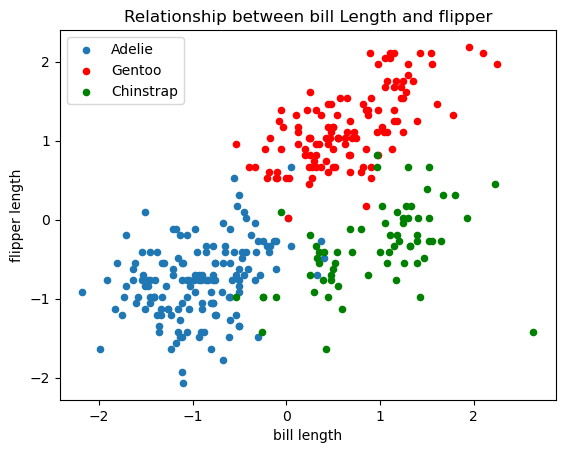

In [15]:
# Initialize the figure
plt.figure(figsize=(14,8))

# Plotting scatter for Iris-setosa:
# creates a scatter plot with sepal_length on the x-axis and sepal_width on the y-axis.
# label='Setosa' assigns a label to the scatter plot, which will appear in the legend.
ax = df[df.species=='Adelie'].plot.scatter(x='bill_length_mm', y='flipper_length_mm', label='Adelie')

# Plotting scatter for the other species
# ax=ax tells Pandas to plot on the existing Axes object created by the first scatter plot, ensuring all species are plotted on the same figure.
# color='r' and color='g' set the colors of the points for 'Iris-versicolor' (red) and 'Iris-virginica' (green), respectively, enhancing visual distinction between species.
df[df.species=='Gentoo'].plot.scatter(x='bill_length_mm', y='flipper_length_mm', 
                                               label='Gentoo', ax=ax, color='r')
df[df.species=='Chinstrap'].plot.scatter(x='bill_length_mm', y='flipper_length_mm', 
                                              label='Chinstrap', ax=ax, color='g')


# Enhancing the plot
ax.set_xlabel("bill length")
ax.set_ylabel("flipper length")
ax.set_title("Relationship between bill Length and flipper")

# Show the plot
plt.show() 

We'll check similar type plotting using seaborn after some moments!

### 2. Delving into Histograms

Next, we dive into histograms to get a distribution overview of the Iris features. Histograms are excellent for understanding the underlying distribution of data points across different intervals.
Understanding Histograms：
1. Bins: The range of values is divided into a series of intervals — these are the bins. Bins are usually specified as consecutive, non-overlapping intervals of a variable.
2. Frequency: The number of data points that fall within each bin's range. In a histogram, the frequency for each bin is represented by the height of the bar, so a taller bar means a higher frequency of data points in that interval.


`DataFrame.hist()` method in `Pandas` helps creat histograms from a DataFrame. Here's a quick reference to the documentation: [Pandas DataFrame.hist](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html).


- **Please read the documentation of `DataFrame.hist()`, and then plot the histograms.**


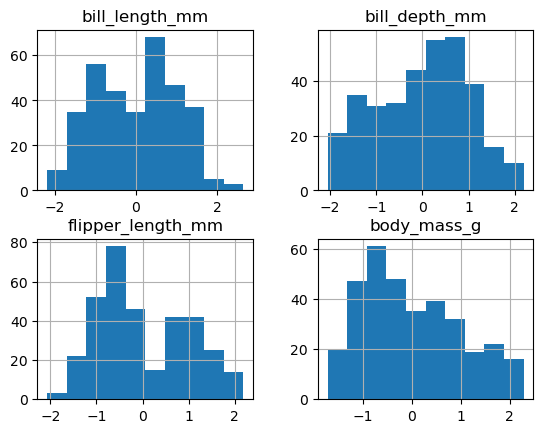

In [16]:
# TODO
df.hist()
plt.show()

### 3. Discovering Box plots 

Let's try another cool `pandas` plotting. Yes, BOX PLOT! 
Boxplots provide a compact representation of data distributions, highlighting the median, quartiles, and outliers.


`DataFrame.boxplot()` method in `Pandas` makes a box plot from DataFrame columns.Here's a quick reference to the documentation: [Pandas DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).



- **Please read the documentation of `DataFrame.boxplot()`, and then plot the box plots for each numerical column.**


array([[<Axes: title={'center': 'bill_depth_mm'}, xlabel='[species]'>,
        <Axes: title={'center': 'bill_length_mm'}, xlabel='[species]'>],
       [<Axes: title={'center': 'body_mass_g'}, xlabel='[species]'>,
        <Axes: title={'center': 'flipper_length_mm'}, xlabel='[species]'>]],
      dtype=object)

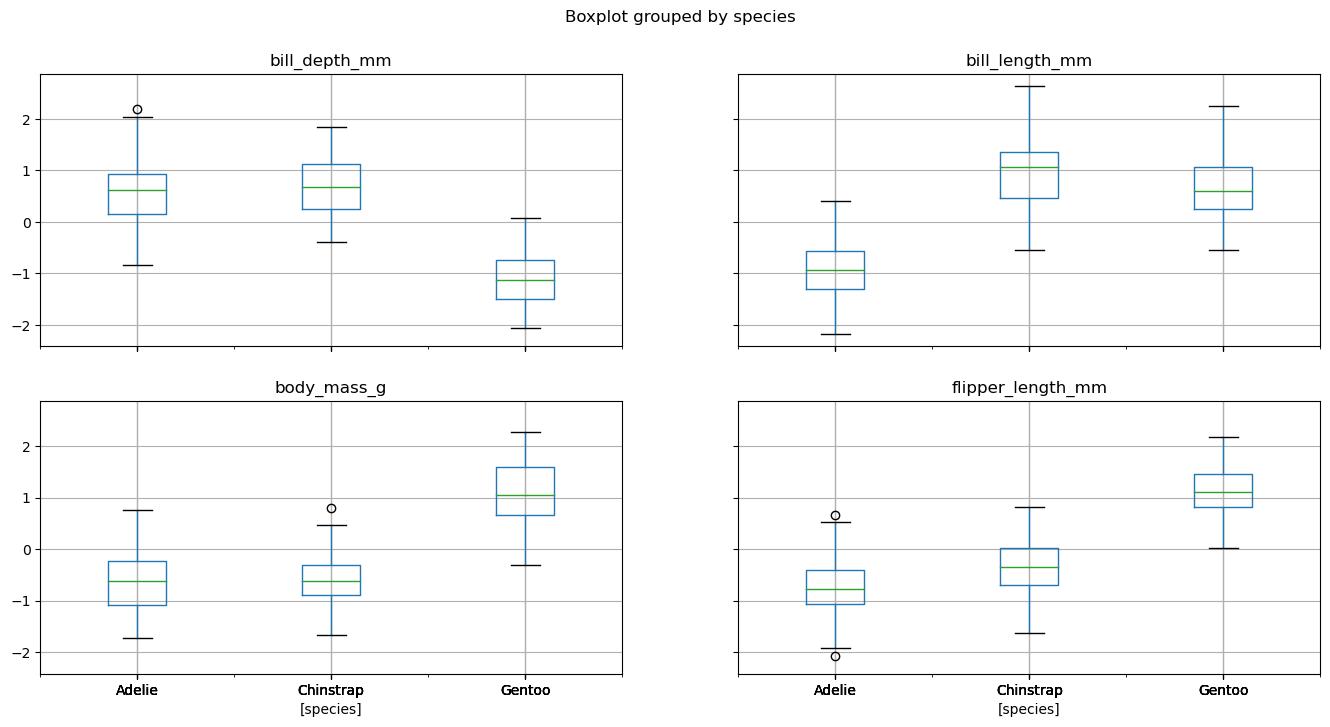

In [17]:
df.boxplot(by = 'species', figsize = (16,8))
# The "by" parameter specifies the column name for which separate box plots should be created.

### 4. Let's try Seaborn for jointplot and pairplot
Seaborn has many nice functions for plotting. You can create jointplot, hisplot, pairplot, boxplot, violinplot (it's damn cool), heatmap polt etc. I recommend seaborn personally cause it has many cool ploting techniques!

#### seaborn jointplot on sepal_length vs sepal_width

`sns.jointplot` in the `Seaborn` library allows users to simultaneously display the distribution of two variables along with their relationship. 
This provides an intuitive perspective for analyzing the relationship between two variables while also showcasing their individual univariate distributions.


Here's a quick reference to the documentation: [Seaborn seaborn.jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

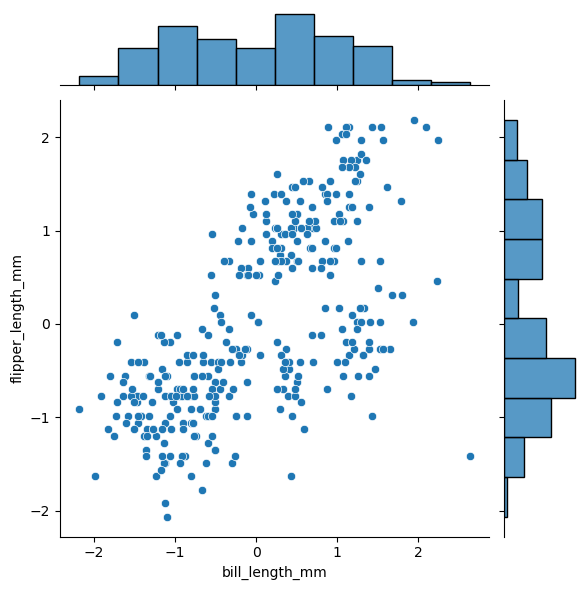

In [18]:
# TODO
sns.jointplot(x='bill_length_mm', y='flipper_length_mm', data=df)

#### Pairplot which shows the bivariate relation among features


`sns.pairplot` from the `Seaborn` library designed for plotting pairwise relationships in a dataset. 
When you have a DataFrame with multiple quantitative variables, `sns.pairplot` can be an invaluable tool for quickly visualizing how each pair of variables relates to one another across the entire dataset. Additionally, it can also plot the univariate distribution of each variable on the diagonal. 


Here's a quick reference to the documentation: [Seaborn seaborn.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html).



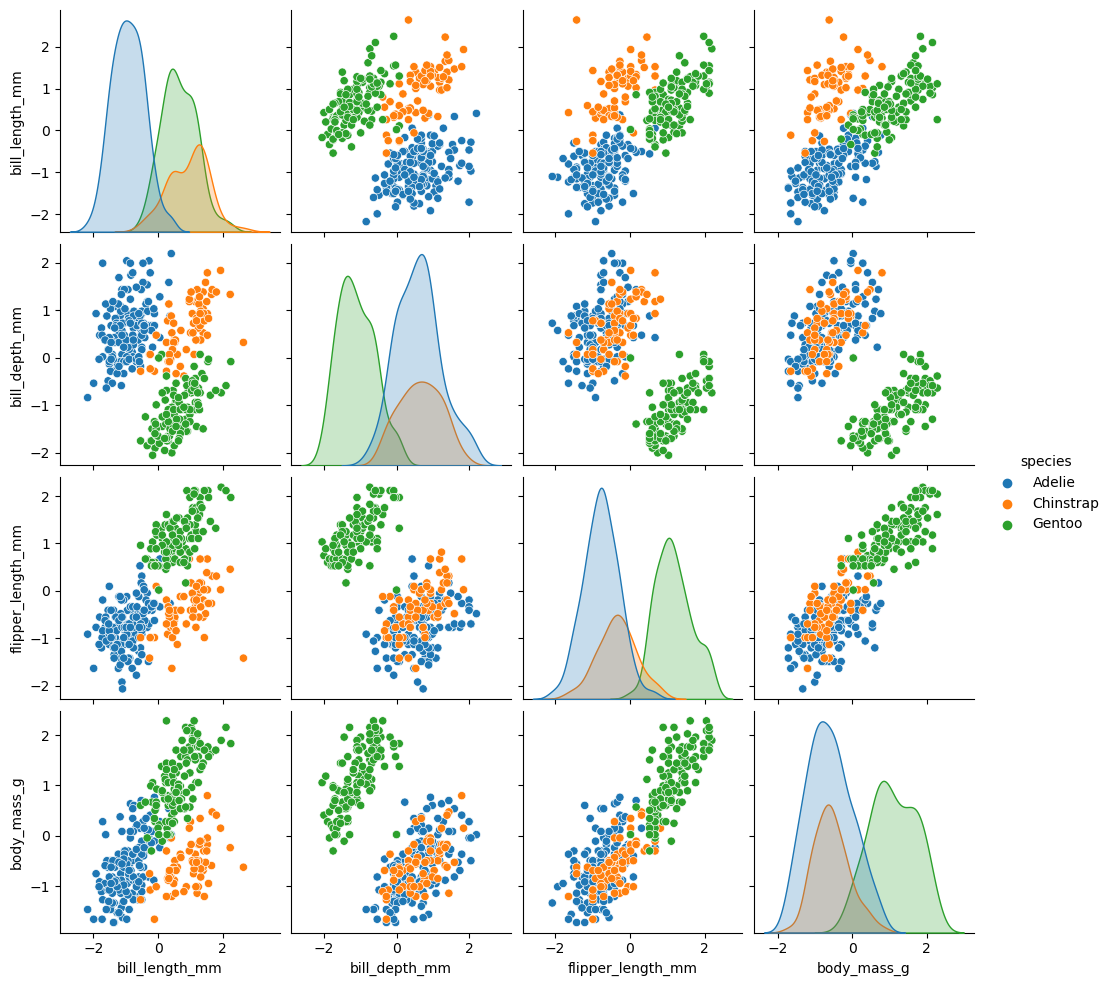

In [19]:
# The "hue" parameter is used to color code the data points in all plots based on the categorical variable species in the DataFrame.
sns.pairplot(data=df, hue='species')

### 5. Parallel coordinates - high dimensional data visualization

Parallel coordinates are a powerful multivariate visualization technique. This method allows us to plot each feature of our dataset on a separate column and then connects these features with lines for each data sample. This approach is particularly useful for visualizing and understanding high-dimensional data, enabling us to spot patterns and relationships across multiple dimensions simultaneously.

We can use `plotting.parallel_coordinates` method in `pandas` library to make parallel coordinate plot.
Here's a quick reference to the documentation: [pandas.plotting.parallel_coordinates](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html).



In [20]:
pd.concat([df['species'], df.select_dtypes(include='number')], axis=1)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,-0.876966,0.777063,-1.418155,-0.561230
1,Adelie,-0.802580,0.119258,-1.057814,-0.496562
2,Adelie,-0.653808,0.422860,-0.409201,-1.207906
3,Adelie,0.019743,-0.006651,0.017097,0.023049
4,Adelie,-1.323281,1.080665,-0.553337,-0.949235
...,...,...,...,...,...
339,Gentoo,0.019743,-0.006651,0.017097,0.023049
340,Gentoo,0.554963,-1.449353,1.032163,0.861459
341,Gentoo,1.224436,-0.740948,1.536640,2.025477
342,Gentoo,0.257419,-1.196352,0.815958,1.314133


<Axes: >

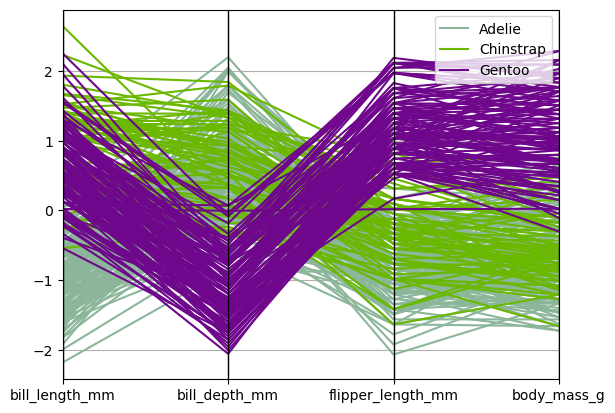

In [21]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates

# TODD
parallel_coordinates(pd.concat([df['species'], df.select_dtypes(include='number')], axis=1), 'species')

### 6.  Correlations among feautres

Understanding how features in your dataset relate to each other is crucial for many analytical tasks.


The Pearson correlation coefficient is a measure that helps in quantifying the linear relationship between variables. In `Pandas`, the `.corr()` method conveniently calculates the Pearson correlation coefficient between every pair of numerical features in a DataFrame, producing a correlation matrix.

A heatmap is an excellent tool for visually representing the correlation matrix. It uses color coding to represent different values, making it easier to discern the strength and direction of the relationships between features at a glance. For creating heatmaps, we turn to the `seaborn.heatmap()` menthod in `Seaborn` library.
Here's a quick reference to the documentation: [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html).



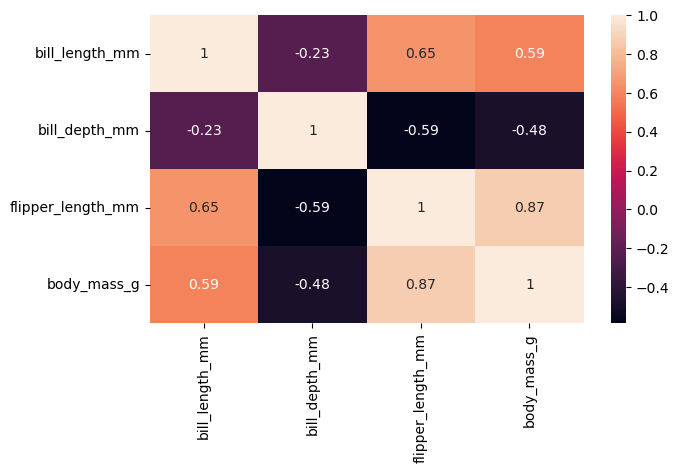

In [22]:
plt.figure(figsize=(7,4)) 
#draws  heatmap with input as the correlation matrix calculted by Pearson correlation coefficient

#TODO
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

plt.show()

From above figure it's clear that Sepal Length and Sepal Width show weak correlations whereas Petal Width and Petal Length show strong correlations. It suggests that the Species can be identified better using Petal compared to Sepal. We can verify it using Machine Learning! 

# Self Practice

Try to repeat the above steps for data preprocessing and visualization on the Penguins dataset. You can find the dataset in the seaborn package.

In [23]:
# Load the Penguins dataset
df = sns.load_dataset('penguins')

# Display the first few rows of the dataset
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [24]:
import numpy as np

# 创建一个包含12个元素的一维数组
arr = np.arange(1, 13)

# 使用 reshape 重新塑形，其中一个维度设置为4，另一个维度用-1自动计算
reshaped_arr = arr.reshape(4, -1)

print("原始数组:\n", arr)
print("重塑后的数组:\n", reshaped_arr)

原始数组:
 [ 1  2  3  4  5  6  7  8  9 10 11 12]
重塑后的数组:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
